In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../')

from matplotlib import pyplot as plt
import numpy as np
import json
import os

from src.utils.dataclasses import (
    ExperimentResults,
    LayerResult,
    SampleResult,
    TrialResult,
)

In [38]:
model = "Llama-2-7b-hf"
relation = "gender_head_of_govt"
prompt_idx = 1

path = os.path.join("../results/sweep", model, relation, str(prompt_idx))
with open(os.path.join(path, "layer_scores.json"), "r") as f:
    results = json.load(f)

In [39]:
layers = list(results["trial_results"][0]["faithfulness"].keys())
layers = [int(layer) for layer in layers]
layers.sort()

layerwise_scores = {layer: [] for layer in layers}

for trial in results["trial_results"]:
    for layer in layers:
        layerwise_scores[layer].append(trial["faithfulness"][str(layer)]["score"])

for layer in layers:
    layerwise_scores[layer] = np.array(layerwise_scores[layer])

(0.4, 1.0)

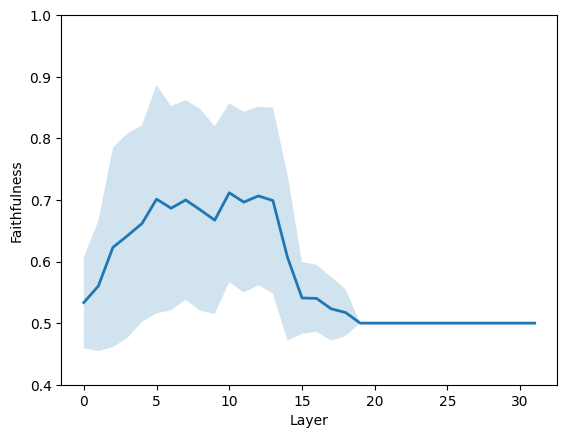

In [40]:
score_means = np.array([np.mean(layerwise_scores[layer]) for layer in layers])
score_stds = np.array([np.std(layerwise_scores[layer]) for layer in layers])

plt.plot(layers, score_means, linewidth=2)
plt.fill_between(layers, score_means - score_stds, score_means + score_stds, alpha=0.2)
plt.xlabel("Layer")
plt.ylabel("Faithfulness")
plt.ylim(0.4, 1)